In [2]:
import numpy as np
from scipy.optimize import check_grad

Y = [[1, 1, 2],
     [-1, 1, 3],
     [-1, 1, 4],
     [1, 2, 3],
     [1, 2, 4],
     [1, 3, 4]]

# Test point
mu = np.zeros(2) # Set mean (mu) as a zero vector
cov_matrix = np.array([[1.0, 0.5], [0.5, 2.0]]) # Set covariance matrix
size = (4, 2)  # Size of the sample (rows, columns)
num_samples = 4 # Number of nodes


In [134]:
def function(point_number_index):
    sum = 0
    alpha = 5
    for m in range(len(Y)):
        if ((Y[m][1] == 1) or (Y[m][2] == 1)):
            distance = (point_number_index-point[Y[m][2]][0])**2 + (point[Y[m][1]][1]-point[Y[m][2]][1])**2
            sum += np.log(1/(1+np.exp(-Y[m][0]*(alpha-distance))))
    return sum


def grad(point_number_index):
    gradient = 0
    alpha = 5
    for m in range(len(Y)):
        if ((Y[m][1] == 1) or (Y[m][2] == 1)): # Check to see if point_number is part of the edge
            connection = Y[m][0] # Check to see if there is a connection
            distance = (np.linalg.norm(point[Y[m][1]] - point[Y[m][2]]))**2 # Calculate the euclidean distance squared
            point_index_diff = (point_number_index - point[Y[m][1]][0]) + (point_number_index - point[Y[m][2]][0]) # Calculate Points_a,i-Points_b,i
            numerator = -2 * connection * point_index_diff * np.exp(-connection * (alpha - distance)) # Calculate the numerator
            denominator = 1 + np.exp(-connection * (alpha - distance)) # Calculate the denominator
            gradient += numerator / denominator # Calculate the fraction and plus all connection there is with point_number together
    return gradient

In [135]:
# Check gradient
epsilon = 1e-6
point = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)} # Generate points from a normal distribution
error = check_grad(function, grad, point[1][0])
print("Gradient error:", error)

Gradient error: 6.764253246416274e-08


In [136]:
hist = np.zeros(10000)
for n in range(10000):
    point = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}
    hist[n] = check_grad(function, grad, point[1][0])

(array([4.348e+03, 2.615e+03, 1.394e+03, 7.060e+02, 3.720e+02, 2.100e+02,
        9.200e+01, 7.500e+01, 5.600e+01, 3.200e+01, 2.000e+01, 2.300e+01,
        9.000e+00, 5.000e+00, 8.000e+00, 1.000e+01, 4.000e+00, 9.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.66551234e-12, 2.82524408e-08, 5.65012160e-08, 8.47499912e-08,
        1.12998766e-07, 1.41247542e-07, 1.69496317e-07, 1.97745092e-07,
        2.25993867e-07, 2.54242643e-07, 2.82491418e-07, 3.10740193e-07,
        3.38988968e-07, 3.67237744e-07, 3.95486519e-07, 4.23735294e-07,
        4.51984069e-07, 4.80232845e-07, 5.08481620e-07, 5.36730395e-07,
        5.64979170e-07, 5.93227946e-07, 6.21476721e-07, 6.49725496e-07,
        6.77974271e-07, 7.06223047e-07, 7.34471822e-07, 7.62720597e-07,
        7.90969372e-07, 8.19218148e-07, 8.47466923e-07]),
 <BarContainer object of 30 artists>)

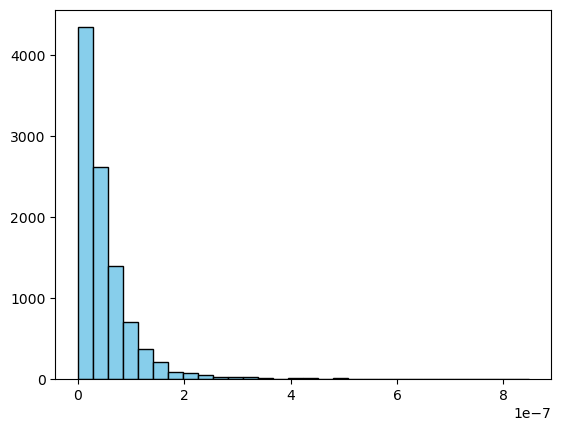

In [137]:
import matplotlib.pyplot as plt
plt.hist(hist, bins = 30, color='skyblue', edgecolor='black')

In [256]:
import autograd.numpy as np
from autograd import grad 
grad_func = grad(function)